#### Import neccessary modules

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import median 

#### Input Data as Data Frames

In [7]:
# for babies23
babies23 = pd.read_csv ("data/babies23.txt", sep= '\s{1,}').set_index("id")
babies23.head()

<ipython-input-7-8dfa50bd92fd>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  babies23 = pd.read_csv ("data/babies23.txt", sep= '\s{1,}').set_index("id")


,pluralty,outcome,date,gestation,sex,wt,parity,race,age,ed,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
id,,,,,,,,,,,,,,,,,,,,,
15,5,1,1411,284,1,120,1,8,27,5,...,8,31,5,65,110,1,1,0,0,0
20,5,1,1499,282,1,113,2,0,33,5,...,0,38,5,70,148,1,4,0,0,0
58,5,1,1576,279,1,128,1,0,28,2,...,5,32,1,99,999,1,2,1,1,1
61,5,1,1504,999,1,123,2,0,36,5,...,3,43,4,68,197,1,8,3,5,5
72,5,1,1425,282,1,108,1,0,23,5,...,0,24,5,99,999,1,1,1,1,5


#### Clean data

In [8]:
# temperarily use two variables only
bwt_smoke_only = pd.DataFrame().assign(bwt = babies23.get("wt"),
                                      smoke = babies23.get("smoke"))
bwt_smoke_only.head()

,bwt,smoke
id,,
15,120,0
20,113,0
58,128,1
61,123,3
72,108,1


#### Partition Data

Partition data by different smoke status of mothers

In [9]:
smoke = bwt_smoke_only[bwt_smoke_only.get("smoke") == 1]
never_smoke = bwt_smoke_only[bwt_smoke_only.get("smoke") == 0]
until_preg = bwt_smoke_only[bwt_smoke_only.get("smoke") == 2]
once_did = bwt_smoke_only[bwt_smoke_only.get("smoke") == 3]

In [10]:
unknown = bwt_smoke_only[bwt_smoke_only.get("smoke") == 9]
len(unknown)

10

There is 10 observations which has no data about smoke status. Exclude them in the summaries and analysis.

#### Numerical Summaries

Make a simple Data Frame for convenience

In [11]:
# for smoke
smoke.get("bwt").describe()

count    484.000000
mean     114.109504
std       18.098946
min       58.000000
25%      102.000000
50%      115.000000
75%      126.000000
max      163.000000
Name: bwt, dtype: float64

In [12]:
# for never_smoke
never_smoke.get("bwt").describe()

count    544.000000
mean     122.777574
std       17.109661
min       55.000000
25%      113.000000
50%      124.000000
75%      132.250000
max      176.000000
Name: bwt, dtype: float64

In [13]:
# for until_preg
until_preg.get("bwt").describe()

count     95.000000
mean     123.084211
std       17.803695
min       62.000000
25%      112.000000
50%      122.000000
75%      136.500000
max      163.000000
Name: bwt, dtype: float64

In [14]:
# for until_preg
once_did.get("bwt").describe()

count    103.000000
mean     124.436893
std       18.608279
min       65.000000
25%      112.000000
50%      124.000000
75%      138.000000
max      170.000000
Name: bwt, dtype: float64

In [15]:
data1 = babies23[['wt',"smoke"]]
data1.head()

,wt,smoke
id,,
15,120,0
20,113,0
58,128,1
61,123,3
72,108,1


In [19]:
print("Distribution of birth weight for babies born to women who smoked During pragnancy:")
print("Average:", np.mean(data1[data1['smoke'] == 1]['wt']))
print("Median:", median(data1[data1['smoke'] == 1]['wt']))
print("Minimum:", min(data1[data1['smoke'] == 1]['wt']))
print("Maximum:", max(data1[data1['smoke'] == 1]['wt']))
print("Std:", np.std(data1[data1['smoke'] == 1]['wt']))

Distribution of birth weight for babies born to women who smoked During pragnancy:
Average: 114.10950413223141
Median: 115.0
Minimum: 58
Maximum: 163
Std: 18.080238760547743


In [20]:
print("Distribution of birth weight for babies born to women who never smoked:")
print("Average:", np.mean(data1[data1['smoke'] == 0]['wt']))
print("Median:", median(data1[data1['smoke'] == 0]['wt']))
print("Minimum:", min(data1[data1['smoke'] == 0]['wt']))
print("Maximum:", max(data1[data1['smoke'] == 0]['wt']))
print("Std:", np.std(data1[data1['smoke'] == 0]['wt']))

Distribution of birth weight for babies born to women who never smoked:
Average: 122.77757352941177
Median: 124.0
Minimum: 55
Maximum: 176
Std: 17.093927714263792


#### Graphical Summaries

Make histogram for each categories.

<AxesSubplot:ylabel='Frequency'>

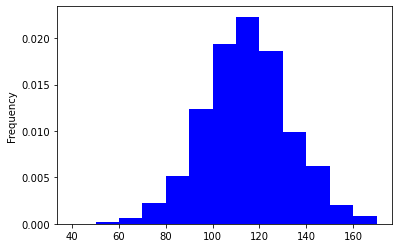

In [18]:
# smoke == 1, smoking mothers
smoke.get("bwt").plot(kind = "hist", bins = np.arange(40, 180, 10), color = "blue", density = True)

<AxesSubplot:ylabel='Frequency'>

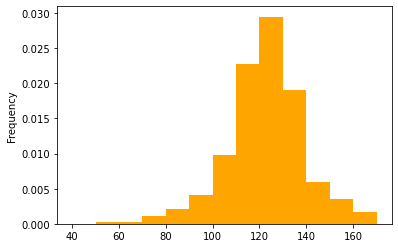

In [21]:
# smoke == 0, non-smoking mothers
never_smoke.get("bwt").plot(kind = "hist", bins = np.arange(40, 180, 10), color = "orange", density = True)

<AxesSubplot:ylabel='Frequency'>

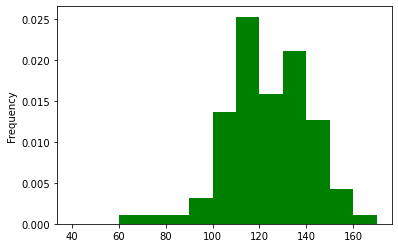

In [22]:
# smoke == 2, smoking until preganancy mothers
until_preg.get("bwt").plot(kind = "hist", bins = np.arange(40, 180, 10), color = "green", density = True)

<AxesSubplot:ylabel='Frequency'>

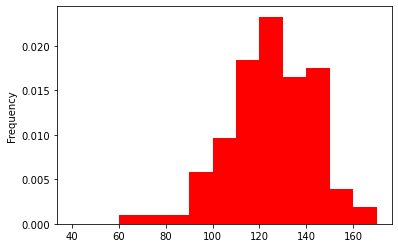

In [23]:
# smoke == 3, once smoked mothers
once_did.get("bwt").plot(kind = "hist", bins = np.arange(40, 180, 10), color = "red", density = True)

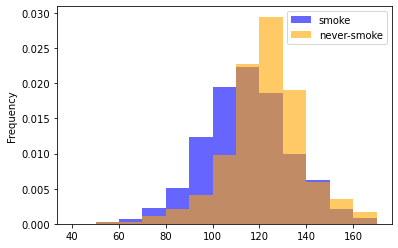

In [24]:
# overlaid histogram for smoking and non-smoking mothers
smoke.get("bwt").plot(kind = "hist", bins = np.arange(40, 180, 10), alpha = 0.6, color = "blue", density = True)
never_smoke.get("bwt").plot(kind = "hist", bins = np.arange(40, 180, 10), alpha = 0.6, color = "orange", density = True)
plt.legend(["smoke", "never-smoke"])

Use quantile-quantile plot

In [25]:
def getQuantile(data):
    output = np.array([])
    for i in np.arange(0, 1.01, 0.01):
        output = np.append(output, np.quantile(data, i))
    return output

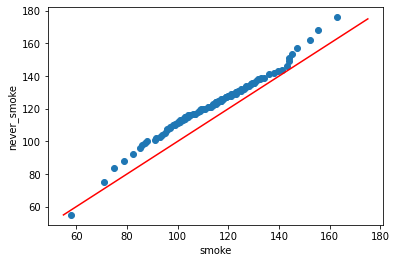

In [26]:
quantile_smoke = getQuantile(smoke.get("bwt"))
quantile_nonSmoke = getQuantile(never_smoke.get("bwt"))

plt.scatter(np.sort(quantile_smoke), quantile_nonSmoke)
plt.xlabel("smoke")
plt.ylabel("never_smoke")
# use 55 and 176 since 55 is min in both groups, and 176 is max in both groups
plt.plot(np.arange(55, 176), np.arange(55, 176), color = "red")

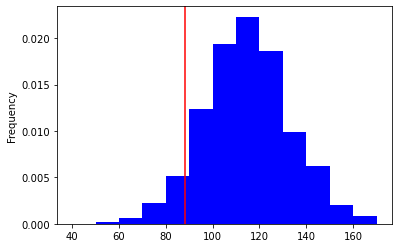

In [27]:
# for low-weight babies of smoke group
smoke.get("bwt").plot(kind = "hist", bins = np.arange(40, 180, 10), color = "blue", density = True)
plt.axvline(x = 88, color = "red")

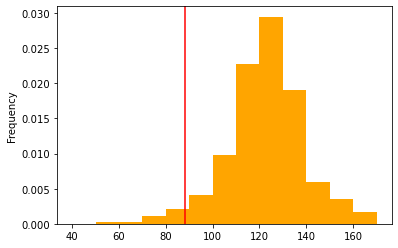

In [28]:
# for low-weight babies of non-smoke group
never_smoke.get("bwt").plot(kind = "hist", bins = np.arange(40, 180, 10), color = "orange", density = True)
plt.axvline(x = 88, color = "red")

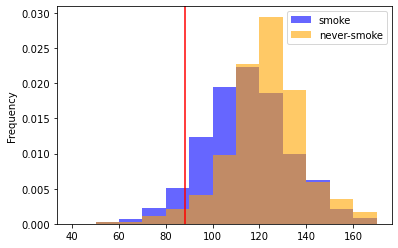

In [29]:
smoke.get("bwt").plot(kind = "hist", bins = np.arange(40, 180, 10), alpha = 0.6, color = "blue", density = True)
never_smoke.get("bwt").plot(kind = "hist", bins = np.arange(40, 180, 10), alpha = 0.6, color = "orange", density = True)
plt.legend(["smoke", "never-smoke"])
plt.axvline(x = 88, color = "red")

Frequencies:

In [30]:
print("Frequency of low-birth-weight babies born to women who smokes:",len(data1[(data1['smoke'] == 1) & (data1['wt'] <= 88)])/len(data1[(data1['smoke'] == 1)]))
print("Frequency of low-birth-weight babies born to women who never smoked:",len(data1[(data1['smoke'] == 0) & (data1['wt'] <= 88)])/len(data1[(data1['smoke'] == 1)]))

Frequency of low-birth-weight babies born to women who smokes: 0.08264462809917356
Frequency of low-birth-weight babies born to women who never smoked: 0.03512396694214876


randomly select 300 samples from each group then calculate frequency again:

In [31]:
smoke = data1[(data1['smoke'] == 1)].sample(n = 300)
not_smoke = data1[(data1['smoke'] == 0)].sample(n = 300)

print("Frequency of low-birth-weight babies born to women who smokes:",len(smoke[smoke["wt"] <= 88])/300)
print("Frequency of low-birth-weight babies born to women who never smoked:",len(not_smoke[not_smoke["wt"] <= 88])/300)

Frequency of low-birth-weight babies born to women who smokes: 0.09666666666666666
Frequency of low-birth-weight babies born to women who never smoked: 0.023333333333333334
